In [1]:
from rdkit import Chem
from rdkit.Chem.Scaffolds import MurckoScaffold
from collections import Counter
import pandas as pd

from IPython.display import Image

In [6]:
# Load the positive and negative SMILES data from CSV files
positive = pd.read_csv('../data/GABAA.csv',encoding='gb18030')['smiles'][0:244].tolist()
negative = pd.read_csv('../data/GABAA.csv',encoding='gb18030')['smiles'][244:].tolist()

In [7]:
print(len(positive))
print(len(negative))

244
244


"""
Murcko scaffolds were designed by Murcko et al. for structural analysis of drugs. 
They break a drug molecule down into four units: 
- Ring system, 
- Linker, 
- Scaffold, 
- Side chain. 
The scaffold is composed of the ring system and linker.

The carbon scaffold represents the molecule as a graph, abstracting its structure where atoms are vertices and bonds are edges, mainly reflecting atomic connectivity. 
All heavy atoms are replaced by carbon, and all bonds are replaced by single bonds.
"""

# positive_CarbonScaffold

In [13]:
# Extract carbon skeleton
positive_CarbonScaffold = []
for smiles in positive:
    mol = Chem.MolFromSmiles(smiles)  # Convert SMILES to molecule object
    scaffold = MurckoScaffold.GetScaffoldForMol(mol)  # Extract scaffold
    scaffold = MurckoScaffold.MakeScaffoldGeneric(scaffold)  # Make the scaffold generic
    scaffold_smiles = Chem.MolToSmiles(scaffold)  # Convert scaffold to SMILES
    positive_CarbonScaffold.append(scaffold_smiles)

# Count occurrences of unique scaffolds in positive dataset
positive_CarbonScaffold_counts = Counter(positive_CarbonScaffold)

# Sort the scaffolds by frequency in descending order
sorted_positive_CarbonScaffold_counts = sorted(positive_CarbonScaffold_counts.items(), key=lambda x: x[1], reverse=True)

# Display sorted scaffolds
sorted_positive_CarbonScaffold_counts

[('', 43),
 ('C1CCCCC1', 32),
 ('CC1CCC(C2CCCCC2)C2CCCCC2C1', 23),
 ('C1CCCC1', 13),
 ('C1CCC(C2CCC3CCCC3C3CCCCC23)CC1', 9),
 ('CC(CC1CCCC1)C1CCC2C1CCC1C3CCCCC3CCC12', 8),
 ('CC1CC(C)CC(C)C1', 7),
 ('CC1CCCC1', 6),
 ('CC(CC1CCC2CCCCC21)C1CCC2C1CCC1C3CCCCC3CCC12', 6),
 ('CC(CC1CC2CCCCC2C1)C1CCC2C1CCC1C3CCCCC3CCC12', 6),
 ('C1CCC2C(C1)CCC1C3CCCC3CCC21', 4),
 ('CC1CC(C2CCCCC2)CC2CCCCC12', 4),
 ('CC(CCC1CCCCC1)C1CCC2CCCCC2C1', 3),
 ('C1CCC2CCCC2C1', 3),
 ('C1CCC(CC2CCCC2)CC1', 2),
 ('C1CCC(C2CCC3CCC(CCC4CCCC4)CC32)CC1', 2),
 ('C1CCC(CCC2CCC3CC4CCCCC4C3C2)CC1', 2),
 ('C1CCC(C2CC3CCCCC3C2)CC1', 2),
 ('C1CCC(C2CCCCC2)CC1', 2),
 ('C1CCC(C2CC3CCCC3CC2C2CCCCC2)CC1', 2),
 ('C1CCC2CCCCC2C1', 2),
 ('C1CCC(C2CCCC2CC2CCC3CCCC3C2)CC1', 2),
 ('CC1CCCCC1', 2),
 ('CC1CC2CCCCC2C2(C3CCCCC3)CCCC2C1', 2),
 ('C1CCC(C2CCC3CCCC3C3CCCC23)CC1', 2),
 ('C1CCC(C2CCC3C(C4CCCC4)CCC3C3CCCCC23)CC1', 2),
 ('C1CC2CCC1C2', 2),
 ('CC1CC(C)C(C2CCCCC2)C(C)C1', 1),
 ('C1CCC2CC2C1', 1),
 ('C1CCC(CCC2CCCC2)CC1', 1),
 ('CC(C1CCCC

In [14]:
len(sorted_positive_CarbonScaffold_counts)

78

In [16]:
# Print the top 78 most common scaffolds in the positive dataset
for skeleton, count in sorted_positive_CarbonScaffold_counts[0:78]:
    print(f'{skeleton}')


C1CCCCC1
CC1CCC(C2CCCCC2)C2CCCCC2C1
C1CCCC1
C1CCC(C2CCC3CCCC3C3CCCCC23)CC1
CC(CC1CCCC1)C1CCC2C1CCC1C3CCCCC3CCC12
CC1CC(C)CC(C)C1
CC1CCCC1
CC(CC1CCC2CCCCC21)C1CCC2C1CCC1C3CCCCC3CCC12
CC(CC1CC2CCCCC2C1)C1CCC2C1CCC1C3CCCCC3CCC12
C1CCC2C(C1)CCC1C3CCCC3CCC21
CC1CC(C2CCCCC2)CC2CCCCC12
CC(CCC1CCCCC1)C1CCC2CCCCC2C1
C1CCC2CCCC2C1
C1CCC(CC2CCCC2)CC1
C1CCC(C2CCC3CCC(CCC4CCCC4)CC32)CC1
C1CCC(CCC2CCC3CC4CCCCC4C3C2)CC1
C1CCC(C2CC3CCCCC3C2)CC1
C1CCC(C2CCCCC2)CC1
C1CCC(C2CC3CCCC3CC2C2CCCCC2)CC1
C1CCC2CCCCC2C1
C1CCC(C2CCCC2CC2CCC3CCCC3C2)CC1
CC1CCCCC1
CC1CC2CCCCC2C2(C3CCCCC3)CCCC2C1
C1CCC(C2CCC3CCCC3C3CCCC23)CC1
C1CCC(C2CCC3C(C4CCCC4)CCC3C3CCCCC23)CC1
C1CC2CCC1C2
CC1CC(C)C(C2CCCCC2)C(C)C1
C1CCC2CC2C1
C1CCC(CCC2CCCC2)CC1
CC(C1CCCCC1)C1CCCCC1
C1CCC(CCC2CCCC3CCCC32)CC1
C1CC2CCC(C2)CC2CC2CCC2CC2C1
CC(CCC1CCCCC1)C(C)C1CCC2CCCCC21
CC1CCCCC2CCC(C2)C(C)CCCC1
C1CCC(C2CCCC(C3CCC4CCCCC43)C2)CC1
CC1CCCC(CCC2CCCCC2)C1
CC1CC2CCCC2C2CCC3CCCCC3C12
CC(CC1CC1)C1CCCC1CC1CCCCC1
CC1CCC2CCCCC12
CC1C2CCCCC2CC1C1CCC2CCCCC2C1

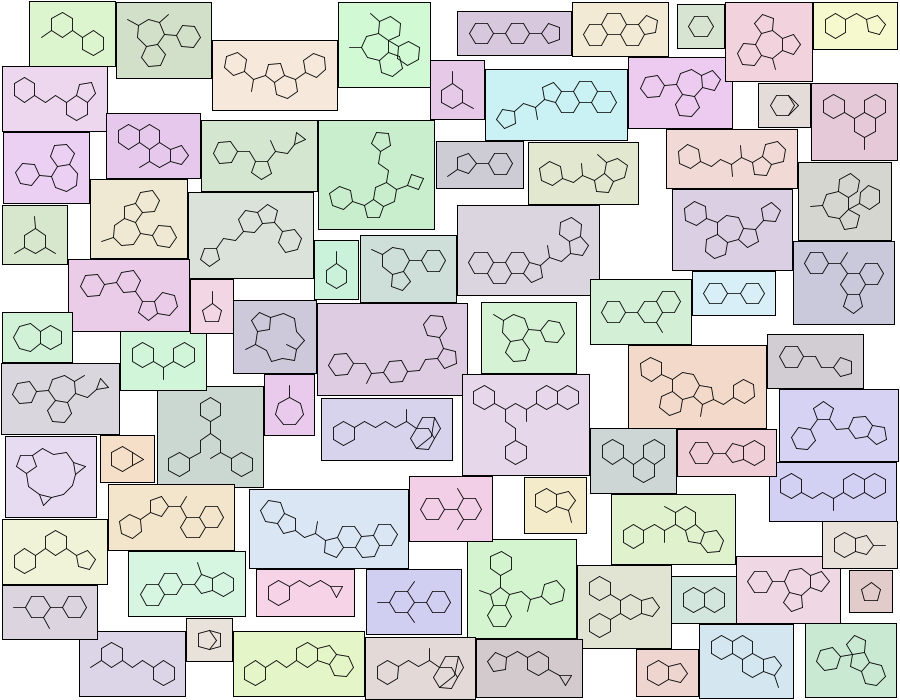

In [17]:
# Display the image (assuming the image file is available)
Image(filename='positive.png')

# nonagonist_CarbonScaffold

In [19]:
# Extract Carbon Scaffolds for negative compounds
negative_CarbonScaffold = []

for smiles in negative:
    mol = Chem.MolFromSmiles(smiles)  # Convert SMILES to molecule object
    scaffold = MurckoScaffold.GetScaffoldForMol(mol)  # Extract scaffold
    scaffold = MurckoScaffold.MakeScaffoldGeneric(scaffold)  # Make the scaffold generic
    scaffold_smiles = Chem.MolToSmiles(scaffold)  # Convert scaffold to SMILES
    negative_CarbonScaffold.append(scaffold_smiles)
    
    
negative_CarbonScaffold_counts = Counter(negative_CarbonScaffold)

sorted_negative_CarbonScaffold_counts = sorted(negative_CarbonScaffold_counts.items(), key=lambda x: x[1], reverse=True)

sorted_negative_CarbonScaffold_counts

[('CC(CCC1CCCCC1)C(C)C1CCC2CCCCC21', 31),
 ('C1CCCC1', 9),
 ('CC1C(C2CCCC2)CCC2C(C3CCCCC3)CCC12', 9),
 ('C1CCC2CCCC2C1', 9),
 ('C1CCC2C(C1)CC1CCCCC12', 8),
 ('C1CCC(C2CCC3C4CCCCC4CCC23)C1', 7),
 ('CC1CCC(C2CCCCC2)CC1', 6),
 ('C1CCC(C2CCCC2)CC1', 6),
 ('CC(C1CCCCC1)C1CC2CCC3CCCCC3C2C1', 6),
 ('C1CCC(C2CCCC2C2CCCCC2)CC1', 5),
 ('CC1C(C2CCCCC2)CC2C3CCCCC3CCC12', 5),
 ('CC1CC(C2CCCCC2)CC2CCCCC12', 4),
 ('', 4),
 ('CC(CCCC1CCCCC1)C(C)C1CCC2CCCCC21', 4),
 ('C1CCC2C(C1)CCC1CCCC12', 4),
 ('C1CCC(C2CC3CCCCC3C2)CC1', 4),
 ('C1CCC(C2CCC3CCCC3C2)CC1', 4),
 ('C1CCC2C(C1)CC1C2CCC2CC3CCCCC3C21', 4),
 ('CC1CC(C2CCCC3CC4CCCC4CC32)C2CCC3CCCC3C12', 3),
 ('C1CCCCC1', 3),
 ('C1CCC(C2CCCC(C3CCCC3C3CCCCC3)C2)CC1', 3),
 ('C1CCC(C2CCCC2CC2CCC3CCCCC3C2)CC1', 3),
 ('C1CCC(C2CCC3CCCC3C3CCCCC23)CC1', 3),
 ('CC(C1CCCCC1)C1CC2CCCCC2C1', 3),
 ('C1CCC(CCC2C3C4CC5C6C4CC3C6C25)CC1', 3),
 ('CC(CC1CC2CCCCC2CC1C1CCCCC1)C1CCCCC1', 2),
 ('C1CCC(C2CCC(C3CCCC3)C2)CC1', 2),
 ('CC1CC2CC3CCCCC(C4CC5CCCCC5C4)C3CC2C1', 2),
 ('C1CCC

In [20]:
len(sorted_negative_CarbonScaffold_counts)

105

In [21]:
# print smiles
for skeleton, count in sorted_negative_CarbonScaffold_counts:
    print(f'{skeleton}')

CC(CCC1CCCCC1)C(C)C1CCC2CCCCC21
C1CCCC1
CC1C(C2CCCC2)CCC2C(C3CCCCC3)CCC12
C1CCC2CCCC2C1
C1CCC2C(C1)CC1CCCCC12
C1CCC(C2CCC3C4CCCCC4CCC23)C1
CC1CCC(C2CCCCC2)CC1
C1CCC(C2CCCC2)CC1
CC(C1CCCCC1)C1CC2CCC3CCCCC3C2C1
C1CCC(C2CCCC2C2CCCCC2)CC1
CC1C(C2CCCCC2)CC2C3CCCCC3CCC12
CC1CC(C2CCCCC2)CC2CCCCC12

CC(CCCC1CCCCC1)C(C)C1CCC2CCCCC21
C1CCC2C(C1)CCC1CCCC12
C1CCC(C2CC3CCCCC3C2)CC1
C1CCC(C2CCC3CCCC3C2)CC1
C1CCC2C(C1)CC1C2CCC2CC3CCCCC3C21
CC1CC(C2CCCC3CC4CCCC4CC32)C2CCC3CCCC3C12
C1CCCCC1
C1CCC(C2CCCC(C3CCCC3C3CCCCC3)C2)CC1
C1CCC(C2CCCC2CC2CCC3CCCCC3C2)CC1
C1CCC(C2CCC3CCCC3C3CCCCC23)CC1
CC(C1CCCCC1)C1CC2CCCCC2C1
C1CCC(CCC2C3C4CC5C6C4CC3C6C25)CC1
CC(CC1CC2CCCCC2CC1C1CCCCC1)C1CCCCC1
C1CCC(C2CCC(C3CCCC3)C2)CC1
CC1CC2CC3CCCCC(C4CC5CCCCC5C4)C3CC2C1
C1CCC(C2CCC(C3CCCC3C3CCCCC3)C2)CC1
C1CCC(CC2CC(C3CCCC3C3CCCCC3)CC2C2CCCCC2)CC1
CC1CC2CCCCC2C2CC(C3CCCCC3)CC12
CC(CCCCC1CCCCC1)C(C)C1CCC2CCCCC21
CC(CC1CCCCC1)C(C)C1CCC2CCCCC21
C1CCC(CC2CCC3CCCCC32)CC1
CC1CCCC2C(CC3CCCCC3)CCC12
CC1CCC2CCCC2C2CCCCC12
C1CCC(CCC2CCC

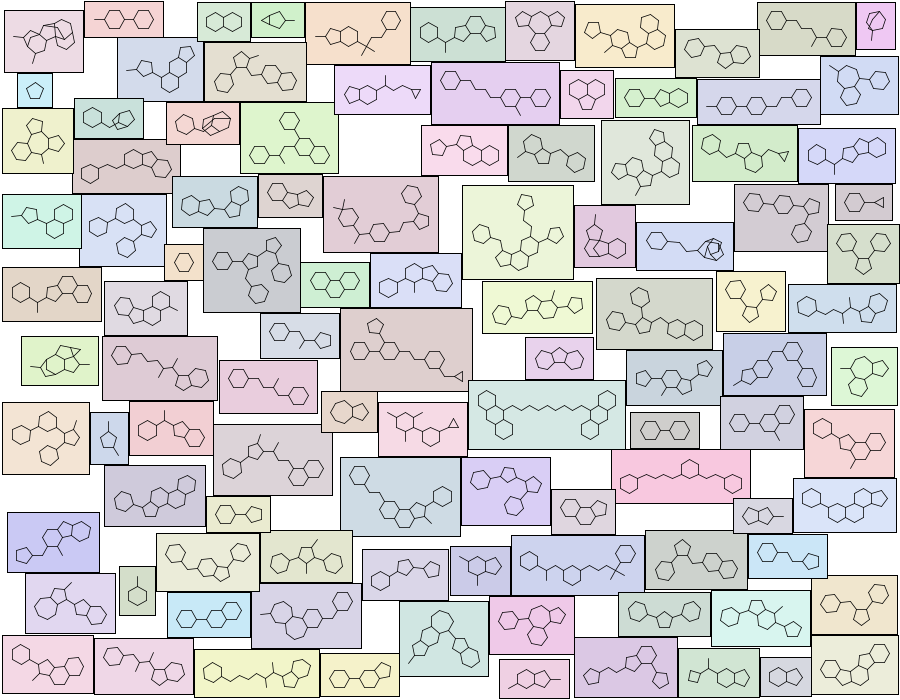

In [22]:
Image(filename='negative.png')